In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

import torch
from torch.nn import CrossEntropyLoss

from util import train_NN, test_loss, loadMNIST, loadCIFAR10, plot_GPmodel
from HyperparamOptimizer import HyperparamOptimizer

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


## CIFAR10 VGG

In [3]:
from Models import VGGNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadCIFAR10(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 6
    input_shape = (batch_size, 3, 32, 32)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = VGGNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0, p_drop=0.2).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


VGG_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
num_samples = 15
num_iterations = 45

VGG_optim.get_sobol_samples(num_samples)
VGG_optim.GPR_optim(num_iterations, 30)

In [5]:
with open('models/VGG/VGG_optimizer.pkl', 'wb') as file:
    pickle.dump(VGG_optim, file)

In [6]:
with open('models/VGG/VGG_optimizer.pkl', 'rb') as file:
    VGG_optim = pickle.load(file)

In [7]:
VGG_optim.GPR_optim(5, 0)

In [8]:
print(VGG_optim.get_best_parameters(3))

[{'acc': 74.252, 'lr': 0.09375, 'momentum': 0.65625, 'p_randomTransform': 0.3125}, {'acc': 72.152, 'lr': 0.08378864744949828, 'momentum': 0.7315053974289858, 'p_randomTransform': 0.7782211507973548}, {'acc': 71.808, 'lr': 0.018873064116434416, 'momentum': 0.9292819279334161, 'p_randomTransform': 0.7836328125}]


In [9]:
print(VGG_optim.values)
print(VGG_optim.points)
print(VGG_optim.gp_predictions)

[[10.   ]
 [39.042]
 [35.442]
 [35.01 ]
 [64.79 ]
 [10.   ]
 [10.   ]
 [70.758]
 [74.252]
 [10.   ]
 [10.   ]
 [41.648]
 [64.404]
 [10.   ]
 [10.   ]
 [53.218]
 [10.   ]
 [64.616]
 [10.   ]
 [45.43 ]
 [10.   ]
 [40.35 ]
 [10.   ]
 [69.324]
 [10.   ]
 [67.546]
 [10.   ]
 [69.636]
 [10.   ]
 [66.83 ]
 [57.9  ]
 [61.32 ]
 [10.   ]
 [66.696]
 [10.   ]
 [43.528]
 [59.936]
 [61.89 ]
 [10.   ]
 [26.066]
 [10.   ]
 [65.23 ]
 [10.   ]
 [39.8  ]
 [10.   ]
 [63.412]
 [50.926]
 [17.78 ]
 [72.152]
 [69.28 ]
 [11.772]
 [11.296]
 [68.6  ]
 [71.808]
 [60.162]
 [60.806]
 [10.632]
 [63.36 ]
 [41.708]
 [35.806]
 [25.306]
 [49.394]
 [31.848]
 [66.694]
 [38.39 ]]
[[0.         0.5        0.        ]
 [0.25       0.75       0.5       ]
 [0.375      0.625      0.75      ]
 [0.125      0.875      0.25      ]
 [0.1875     0.6875     0.625     ]
 [0.4375     0.9375     0.125     ]
 [0.3125     0.5625     0.375     ]
 [0.0625     0.8125     0.875     ]
 [0.09375    0.65625    0.3125    ]
 [0.34375    0.90625    0

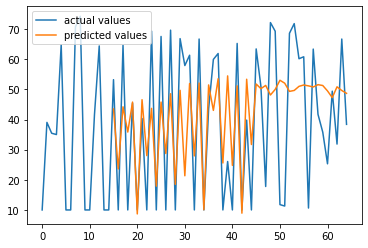

In [10]:
plt.plot(VGG_optim.values, label = 'actual values')
plt.plot(VGG_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

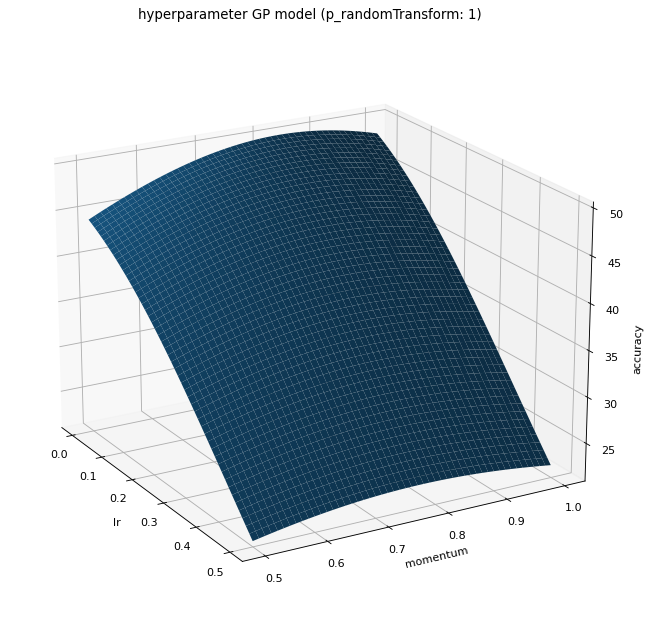

In [11]:
plot_GPmodel(VGG_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

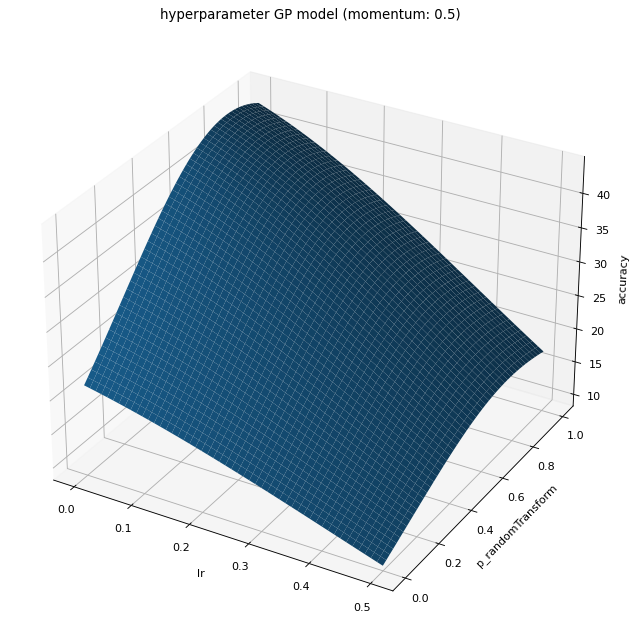

In [12]:
plot_GPmodel(VGG_optim, "lr", "p_randomTransform", "momentum", 0.5)

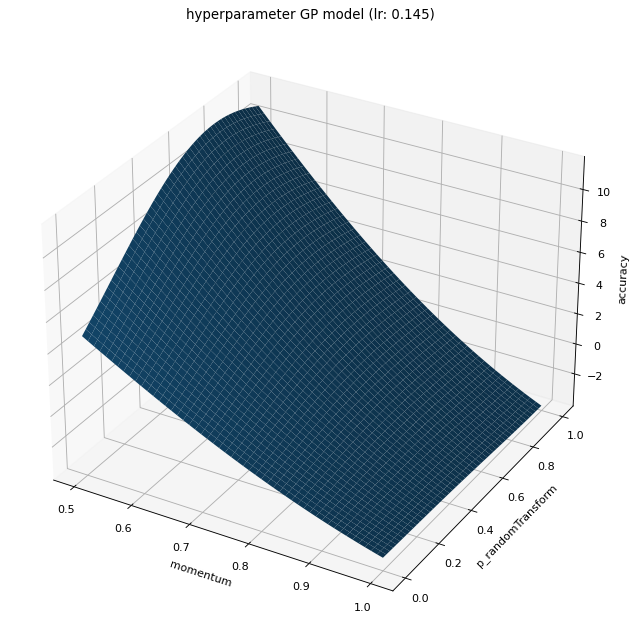

In [13]:
plot_GPmodel(VGG_optim, "momentum", "p_randomTransform", "lr", 0.145)

## CIFAR10 ASL_VGG

In [4]:
from Models import ASL_VGGNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadCIFAR10(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 12
    input_shape = (batch_size, 3, 32, 32)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = ASL_VGGNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0, device=device, p_drop=0.2, expansion_rate=1).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


ASL_VGG_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
num_samples = 12
num_iterations = 33

ASL_VGG_optim.get_sobol_samples(num_samples)
ASL_VGG_optim.GPR_optim(num_iterations, 23)

In [6]:
with open('models/VGG/ASL_VGG_optimizer.pkl', 'wb') as file:
    pickle.dump(ASL_VGG_optim, file)

In [7]:
with open('models/VGG/ASL_VGG_optimizer.pkl', 'rb') as file:
    ASL_VGG_optim = pickle.load(file)

In [8]:
print(ASL_VGG_optim.get_best_parameters(3))

[{'acc': 82.592, 'lr': 0.05224609375, 'momentum': 0.78564453125, 'p_randomTransform': 0.0107421875}, {'acc': 79.078, 'lr': 0.08947506874612457, 'momentum': 0.5519628906250001, 'p_randomTransform': 0.6442425579588916}, {'acc': 78.9, 'lr': 0.10085937499999999, 'momentum': 0.6542951899242178, 'p_randomTransform': 0.5951562499999999}]


In [9]:
print(ASL_VGG_optim.values)
print(ASL_VGG_optim.points)
print(ASL_VGG_optim.gp_predictions)

[[ 9.84 ]
 [56.196]
 [57.558]
 [62.708]
 [70.93 ]
 [10.   ]
 [71.07 ]
 [75.5  ]
 [77.278]
 [10.   ]
 [58.59 ]
 [62.038]
 [74.938]
 [64.218]
 [74.426]
 [10.   ]
 [73.378]
 [53.812]
 [72.53 ]
 [10.   ]
 [78.9  ]
 [57.504]
 [76.216]
 [51.436]
 [74.396]
 [10.   ]
 [77.072]
 [60.11 ]
 [77.9  ]
 [10.   ]
 [77.264]
 [82.592]
 [74.754]
 [10.   ]
 [77.762]
 [58.946]
 [78.228]
 [77.38 ]
 [78.708]
 [79.078]
 [75.882]
 [74.604]
 [75.074]
 [63.448]
 [77.546]]
[[0.         0.5        0.        ]
 [0.25       0.75       0.5       ]
 [0.375      0.625      0.75      ]
 [0.125      0.875      0.25      ]
 [0.1875     0.6875     0.625     ]
 [0.4375     0.9375     0.125     ]
 [0.3125     0.5625     0.375     ]
 [0.0625     0.8125     0.875     ]
 [0.09375    0.65625    0.3125    ]
 [0.34375    0.90625    0.8125    ]
 [0.46875    0.53125    0.5625    ]
 [0.21875    0.78125    0.0625    ]
 [0.12970288 0.74898438 0.63364531]
 [0.33569336 0.55834961 0.98095703]
 [0.13642262 0.72072798 0.69406238]
 [0.03955

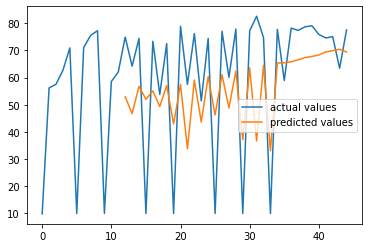

In [10]:
plt.plot(ASL_VGG_optim.values, label = 'actual values')
plt.plot(ASL_VGG_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

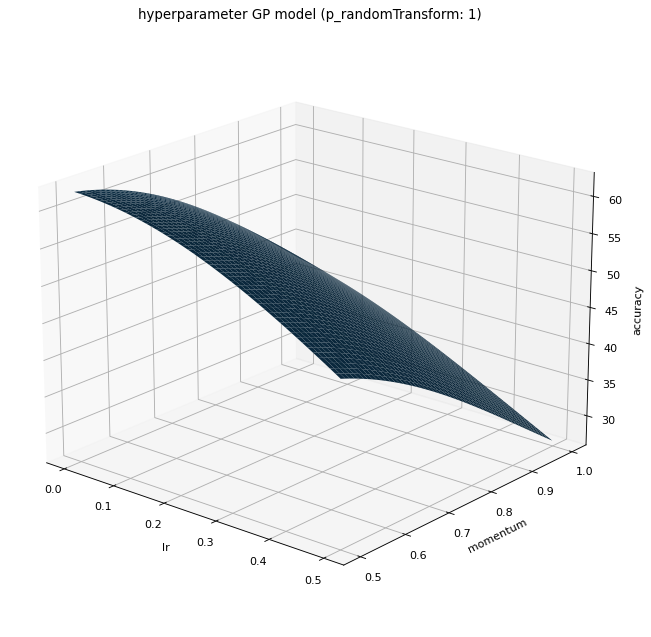

In [11]:
plot_GPmodel(ASL_VGG_optim, "lr", "momentum", "p_randomTransform", 1, azim=-50, elevation=20)

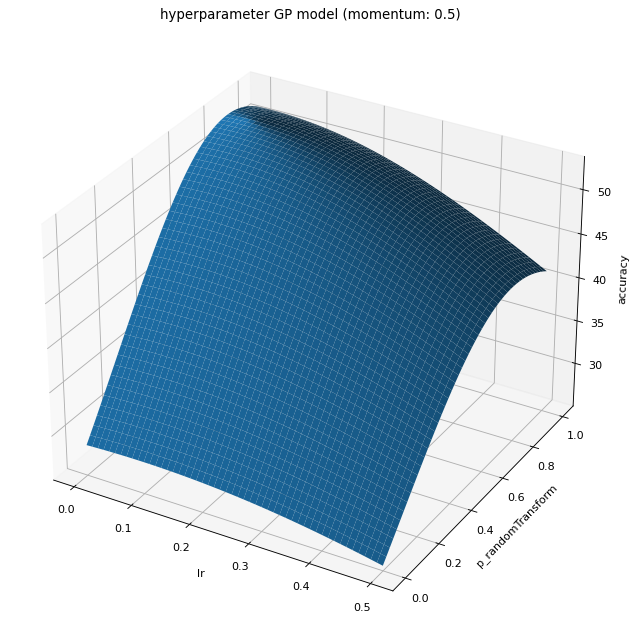

In [20]:
plot_GPmodel(ASL_VGG_optim, "lr", "p_randomTransform", "momentum", 0.5)

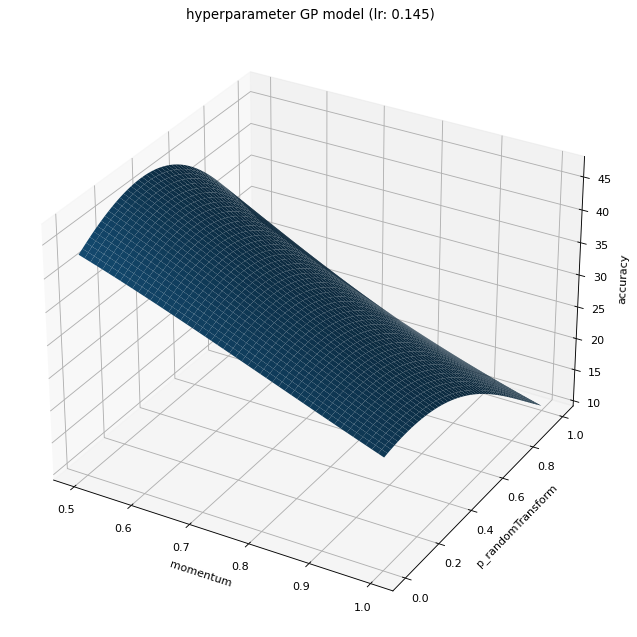

In [12]:
plot_GPmodel(ASL_VGG_optim, "momentum", "p_randomTransform", "lr", 0.145)